**Section 1 - Funnel Analysis**

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('AssignmentData.xlsx')

In [3]:
df.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8,0.8865
2,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
3,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
4,2015-01-01 00:00:00,Q1,Sewing,0.8,1920,56,NaN


In [4]:
df.sample(5)

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
1054,2015-04-03 00:00:00,Q1,Sewing,0.8,4080,34,0.800402
790,2/16/2015,Q3,Sewing,0.8,0,59,0.80098
771,2/15/2015,Q3,Finishing,0.75,240,2,0.760833
1112,2015-08-03 00:00:00,Q2,Finishing,0.5,960,8,NaN
184,2015-11-01 00:00:00,Q2,Sewing,0.8,6420,55,0.690183


In [5]:
missing_values = df.isnull().sum()

In [6]:
missing_values

Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      29
dtype: int64

In [7]:
df["Targeted Productivity"].unique()

array([0.8, 0.75, 0.7, 0.65, 'What do you think should be here?', 0.6,
       0.35, 0.5, 0.07, 0.4], dtype=object)

In [8]:
df['Targeted Productivity'] = pd.to_numeric(df['Targeted Productivity'], errors='coerce')
mode_value = df['Targeted Productivity'].mode()[0]
df['Targeted Productivity'] = df['Targeted Productivity'].fillna(mode_value)

In [9]:
df["Targeted Productivity"].unique()

array([0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.35, 0.5 , 0.07, 0.4 ])

In [10]:
productivity_frequency = df['Targeted Productivity'].value_counts()

In [11]:
productivity_frequency

0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: Targeted Productivity, dtype: int64

In [12]:
df["Overtime"].unique()

array([7080, 960, 3660, 1920, 6720, 6900, 6000, 6480, 2160, 7200, 1440,
       6600, 5640, 1560, 6300, 6540, 13800, 6975, 7020, 6780, 4260, 6660,
       4320, 6960, 2400, 3840, 4800, 4440, 1800, 2700, 10620, 10350, 9900,
       5310, 10170, 4470, 10530, 10440, 5490, 5670, 9720, 12600, 10050,
       15120, 14640, 900, 25920, 10260, 2760, 4710, 9540, 7680, 3600,
       'Some secret message?', 6420, 7980, 3240, 8220, 6930, 8460, 7350,
       5400, 1620, 1980, 2970, 7320, 5100, 3390, 1260, 3420, 8970, 4950,
       10080, 9810, 6570, 5040, 4380, 3630, 8280, 6120, 5580, 3720, 5760,
       7470, 10500, 6360, 4140, 8400, 12180, 9000, 15000, 10770, 12000,
       9360, 3060, 2520, 720, 3780, 10320, 360, 6840, 1080, 1200, 4080,
       240, 5880, 6240, 4200, 3960, 600, 2280, 5940, 1320, 5460, 2040,
       4020, 3000, 3360, 5820, 6060, 2640, 7500, 2880, 120, 3300, 0, 3480,
       7380, 4560, 7140, 5160, 5280, 840, 5520, 480, 8160, 5700, 2820,
       5340, 1680, 7560, 1700, 4680, 3120], dtype=object

In [13]:
Overtime_frequency = df['Overtime'].value_counts()
Overtime_frequency

960      129
1440     111
6960      61
6840      48
1200      39
        ... 
25920      1
14640      1
15120      1
10050      1
3120       1
Name: Overtime, Length: 144, dtype: int64

In [14]:
mode_value = df['Overtime'].mode()[0]
df['Overtime'] = df['Overtime'].replace('Some secret message?', mode_value)

In [15]:
df['Overtime'].unique()

array([ 7080,   960,  3660,  1920,  6720,  6900,  6000,  6480,  2160,
        7200,  1440,  6600,  5640,  1560,  6300,  6540, 13800,  6975,
        7020,  6780,  4260,  6660,  4320,  6960,  2400,  3840,  4800,
        4440,  1800,  2700, 10620, 10350,  9900,  5310, 10170,  4470,
       10530, 10440,  5490,  5670,  9720, 12600, 10050, 15120, 14640,
         900, 25920, 10260,  2760,  4710,  9540,  7680,  3600,  6420,
        7980,  3240,  8220,  6930,  8460,  7350,  5400,  1620,  1980,
        2970,  7320,  5100,  3390,  1260,  3420,  8970,  4950, 10080,
        9810,  6570,  5040,  4380,  3630,  8280,  6120,  5580,  3720,
        5760,  7470, 10500,  6360,  4140,  8400, 12180,  9000, 15000,
       10770, 12000,  9360,  3060,  2520,   720,  3780, 10320,   360,
        6840,  1080,  1200,  4080,   240,  5880,  6240,  4200,  3960,
         600,  2280,  5940,  1320,  5460,  2040,  4020,  3000,  3360,
        5820,  6060,  2640,  7500,  2880,   120,  3300,     0,  3480,
        7380,  4560,

In [16]:
df['No. of Workers'].unique()

array([59, 8, 30.5, 56, 57.5, 55, 54, 18, 60, 12, 20, 17, 56.5, 54.5,
       29.5, 31.5, 31, 55.5, 58, 10, 16, 32, 58.5, 15, 5, 57, 53, 51.5, 2,
       9, 'Keep up the good work!', 7, 19, 28, 34, 89, 14, 25, 52, 4, 21,
       35, 51, 33, 11, 33.5, 22, 26, 27, 59.5, 50, 44, 49, 47, 48, 42, 24,
       45, 46, 39, 38, 6], dtype=object)

In [17]:
Workers_frequency = df['No. of Workers'].value_counts()
Workers_frequency

8.0     262
58.0    114
57.0    109
59.0     75
10.0     60
       ... 
89.0      1
26.0      1
4.0       1
33.5      1
6.0       1
Name: No. of Workers, Length: 62, dtype: int64

In [18]:
df['No. of Workers'] = pd.to_numeric(df['No. of Workers'], errors='coerce')
mode_value = df['No. of Workers'].mode()[0]
df['No. of Workers'] = df['No. of Workers'].fillna(mode_value)

In [19]:
df['No. of Workers'].unique()

array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. , 18. , 60. , 12. , 20. ,
       17. , 56.5, 54.5, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. , 32. ,
       58.5, 15. ,  5. , 57. , 53. , 51.5,  2. ,  9. ,  7. , 19. , 28. ,
       34. , 89. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. , 11. ,
       33.5, 22. , 26. , 27. , 59.5, 50. , 44. , 49. , 47. , 48. , 42. ,
       24. , 45. , 46. , 39. , 38. ,  6. ])

In [20]:
df['Actual Productivity'].unique()

array([0.940725424, 0.8865, 0.800570492, nan, 0.800125, 0.755166667,
       0.753683478, 0.753097531, 0.750427826, 0.721126957, 0.712205247,
       0.707045902, 0.705916667, 0.676666667, 0.593055556, 0.540729167,
       0.52118, 0.988024691, 0.987880435, 0.956270833, 0.945277778,
       0.902916667, 0.800725314, 0.800322936, 0.800318644, 0.800237288,
       0.800148649, 0.787299691, 0.782447917, 0.75024303, 0.7018125,
       0.700134038, 0.699965217, 0.628333333, 0.6253125, 0.991388889,
       0.931645833, 0.915229167, 0.879714482, 0.861679012, 0.850569492,
       0.850436438, 0.850345133, 0.800598058, 0.800237838, 0.800030199,
       0.792104167, 0.759228395, 0.750348457, 0.682708333, 0.667604167,
       0.603432184, 0.345833333, 0.961059028, 0.939513889, 0.893663194,
       0.875390625, 0.820833333, 0.804416667, 0.800684366, 0.800250962,
       0.800246011, 0.800076522, 0.763375, 0.759270833, 0.7504,
       0.664583333, 0.600028736, 0.966781346, 0.936496212, 0.899166667,
       0.888

In [21]:
Actual_Productivity_frequency = df['Actual Productivity'].value_counts()
Actual_Productivity_frequency

0.800402    24
0.850137    12
1.000230    11
0.971867    11
0.750651    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: Actual Productivity, Length: 867, dtype: int64

In [22]:
df['Actual Productivity'] = pd.to_numeric(df['Actual Productivity'], errors='coerce')

# Calculate the median of the non-null numeric values
median_value = df['Actual Productivity'].median()

# Fill missing values with the median
df['Actual Productivity'].fillna(median_value, inplace=True)

In [23]:
missing_values = df.isnull().sum()
missing_values

Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64

In [24]:
duplicates = df[df.duplicated()]
duplicates

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
27,2015-03-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.800319
31,2015-03-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125
69,2015-05-01 00:00:00,Q1,Sewing,0.80,6780,56.5,0.800684
73,2015-05-01 00:00:00,Q1,Sewing,0.80,7200,32.0,0.800246
75,2015-05-01 00:00:00,Q1,Sewing,0.80,6900,57.5,0.800077
89,2015-06-01 00:00:00,Q1,Sewing,0.80,10620,59.0,0.850502
93,2015-06-01 00:00:00,Q1,Sewing,0.80,10350,57.5,0.800594
97,2015-06-01 00:00:00,Q1,Sewing,0.80,10170,56.5,0.800129
107,2015-07-01 00:00:00,Q1,Sewing,0.80,10620,59.0,0.850502


In [25]:
df = df.drop_duplicates()

In [26]:
duplicates = df[df.duplicated()]
duplicates

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity


In [27]:
df.shape

(1162, 7)

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [29]:
features = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']

In [30]:
features

['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']

In [31]:
x = df[features]

In [32]:
x

,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,0.80,7080,59.0,0.940725
1,0.75,960,8.0,0.886500
2,0.80,3660,30.5,0.800570
4,0.80,1920,56.0,0.773333
5,0.80,6720,56.0,0.800125
...,...,...,...,...
1192,0.75,960,8.0,0.628333
1193,0.70,960,8.0,0.773333
1194,0.65,960,8.0,0.625625
1195,0.75,1800,15.0,0.505889


In [33]:
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

In [34]:
x_standardized

array([[ 0.73034046,  0.7845875 ,  1.1115455 ,  1.19415129],
       [ 0.22051491, -1.06777178, -1.18670338,  0.8808487 ],
       [ 0.73034046, -0.25055445, -0.17277005,  0.38436687],
       ...,
       [-0.79913619, -1.06777178, -1.18670338, -0.62642975],
       [ 0.22051491, -0.81352638, -0.87125746, -1.31823871],
       [-0.28931064, -1.14041332, -1.27683079, -1.96053529]])

In [35]:
pca = PCA()
pca.fit(x_standardized)

PCA()

In [36]:
explained_variance = pca.explained_variance_ratio_

In [37]:
explained_variance

array([0.45001791, 0.33436451, 0.14887539, 0.06674219])

In [38]:
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance >= 0.90) + 1

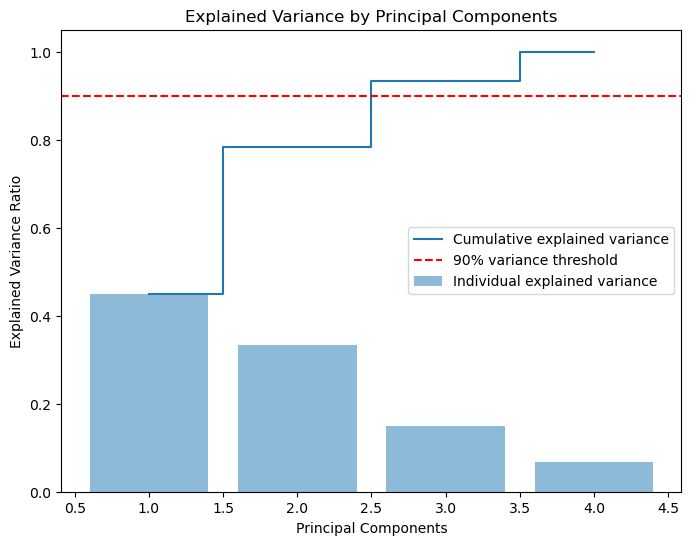

In [39]:
plt.figure(figsize=(8,6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance threshold')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()

In [40]:
num_components


3

In [41]:
df

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,0.773333
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125
...,...,...,...,...,...,...,...
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960,8.0,0.628333
1193,2015-11-03 00:00:00,Q2,Finishing,0.70,960,8.0,0.773333
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960,8.0,0.625625
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15.0,0.505889


In [42]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [43]:
# Resample the data to get weekly mean of 'Actual Productivity'
weekly_data = df.resample('W', on='Date').mean()

C:\Users\Abhi\AppData\Local\Temp\ipykernel_23112\2899182591.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = df.resample('W', on='Date').mean()


In [44]:
# Select the 'Actual Productivity' column
productivity_data = weekly_data['Actual Productivity']

In [45]:
train_data = productivity_data[:-4]
test_data = productivity_data[-4:]


In [46]:
# Build the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1, 1, 1))  # (p, d, q) parameters

# Fit the model
model_fit = model.fit()


In [47]:
# Forecast the next 4 weeks
forecast = model_fit.forecast(steps=4)


In [48]:
forecast

2015-11-15    0.755753
2015-11-22    0.753548
2015-11-29    0.752488
2015-12-06    0.751978
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [49]:
test_data = test_data.dropna()
forecast = pd.Series(forecast).dropna()

In [50]:
test_data = test_data[:len(forecast)]

In [51]:
# Resample and calculate the weekly mean for a specific column (e.g., 'Actual Productivity')
weekly_data = df.resample('W', on='Date')['Actual Productivity'].mean()


In [52]:
# # Calculate Mean Squared Error (MSE)
# mse = mean_squared_error(test_data, forecast)

# # Calculate Mean Absolute Percentage Error (MAPE)
# mape = mean_absolute_percentage_error(test_data, forecast)

# # Print the results
# print(f'Mean Squared Error (MSE): {mse}')
# print(f'Mean Absolute Percentage Error (MAPE): {mape}')


In [53]:
print(len(test_data))
print(len(forecast))


1
4


In [54]:
# If test_data and forecast are numpy arrays
import numpy as np

test_data = np.array(test_data).flatten()
forecast = np.array(forecast).flatten()


In [55]:
min_length = min(len(test_data), len(forecast))
test_data = test_data[:min_length]
forecast = forecast[:min_length]


In [56]:
# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mse = mean_squared_error(test_data, forecast)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test_data, forecast)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


Mean Squared Error (MSE): 0.0010932201449831902
Mean Absolute Percentage Error (MAPE): 4.575116868634353


In [57]:
# import matplotlib.pyplot as plt

# # Plot the actual vs predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(test_data, label='Actual Data')
# plt.plot(forecast, label='Forecasted Data', color='red')
# plt.title('Actual vs Forecasted Productivity')
# plt.xlabel('Time')
# plt.ylabel('Productivity')
# plt.legend()
# plt.show()


In [58]:
test_data

array([0.72268929])

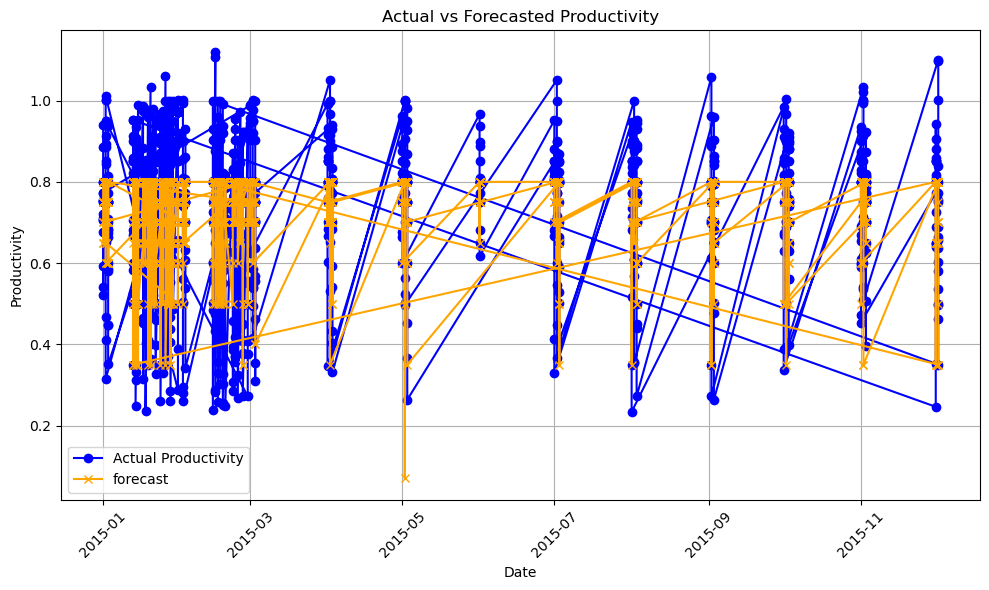

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Actual Productivity'], label='Actual Productivity', color='blue', marker='o')
plt.plot(df['Date'], df['Targeted Productivity'], label='forecast', color='orange', marker='x')

plt.title('Actual vs Forecasted Productivity')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

In [60]:
df['Actual Productivity']

0       0.940725
1       0.886500
2       0.800570
4       0.773333
5       0.800125
          ...   
1192    0.628333
1193    0.773333
1194    0.625625
1195    0.505889
1196    0.394722
Name: Actual Productivity, Length: 1162, dtype: float64

In [61]:
# Check column names in the dataset
print(df.columns)


Index(['Date', 'Quarter', 'Department', 'Targeted Productivity', 'Overtime',
       'No. of Workers', 'Actual Productivity'],
      dtype='object')


In [62]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_standardized)
df['Cluster'] = kmeans.labels_



C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\cluster\_k

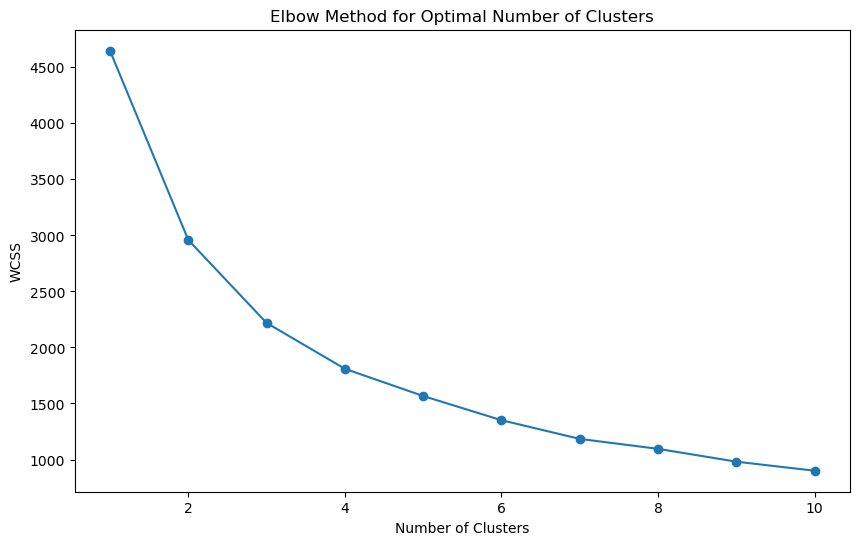

In [64]:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_standardized)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


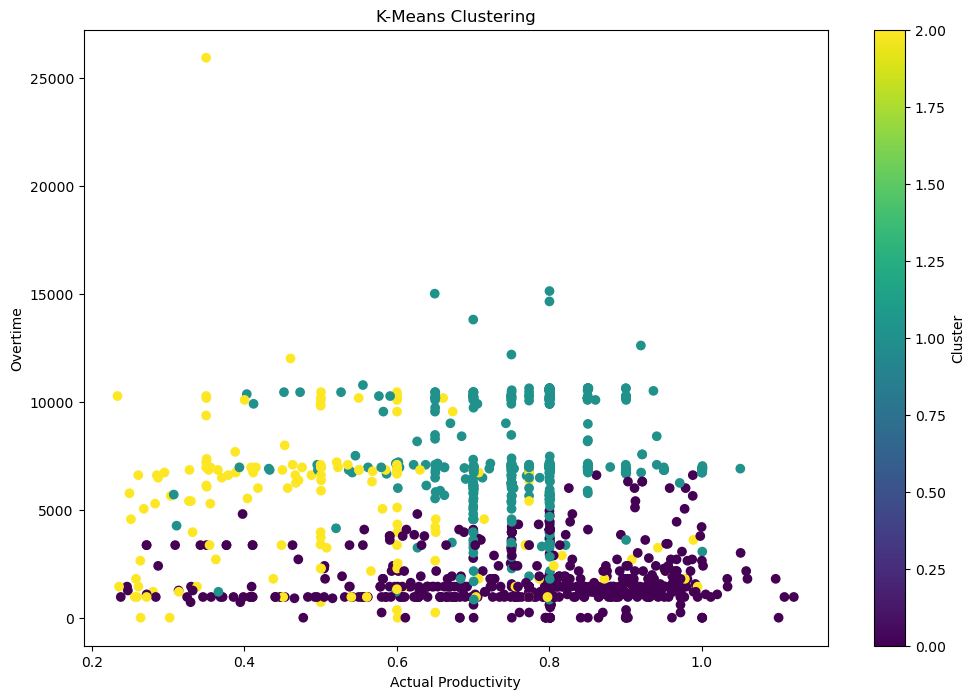

In [65]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Actual Productivity'], df['Overtime'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Actual Productivity')
plt.ylabel('Overtime')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [66]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centroids:")
print(pd.DataFrame(centroids, columns=x.columns))


Cluster Centroids:
   Targeted Productivity      Overtime  No. of Workers  Actual Productivity
0               0.488571   1788.000000       10.628571             0.824192
1               0.704167   6920.625000       54.958333             0.410983
2               0.765570   1891.578947       11.114035             0.904669
3               0.759649  10448.157895       54.592105             0.788028
4               0.439400   7113.000000       52.060000             0.458451
5               0.707432   1725.405405        9.445946             0.386348
6               0.780573   6702.611465       56.232484             0.835054
7               0.666788   6543.503650       54.667883             0.672834
8               0.776048   3252.514970       42.823353             0.779268
9               0.766447   1463.289474        8.927632             0.679971


Summary

Optimal Clusters: Based on the Elbow Method, choose the optimal number of clusters.
Cluster Insights: The scatter plot and centroid values will help you understand the segments. For instance, clusters with high productivity might indicate efficient worker groups, while clusters with high overtime might suggest areas needing improvement.

In [67]:
x

,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,0.80,7080,59.0,0.940725
1,0.75,960,8.0,0.886500
2,0.80,3660,30.5,0.800570
4,0.80,1920,56.0,0.773333
5,0.80,6720,56.0,0.800125
...,...,...,...,...
1192,0.75,960,8.0,0.628333
1193,0.70,960,8.0,0.773333
1194,0.65,960,8.0,0.625625
1195,0.75,1800,15.0,0.505889
